# Datenanalyse: "YouTube Trends in Deutschland"
- das ist wichtig bei jedem Data Science Projekt
- zuerst schaut man sich die Daten einmal gründlich an, um daraus Erkenntnisse zu gewinnen
- bspw. Trends und Muster, Ausreißer und interessante Zusammenhänge

Welche Daten sind das:
Es handelt sich hierbei um selbst gesammelte YouTube Daten.






## Vorbereitungsteil
### 1. Python Bibliotheken importieren
- Bibliotheken müssen vorher via pip oder conda installiert werden, bevor man sie importieren kann
- Wir Nutzen Pandas als Bibliothek für Datenanalyse
- matplotlib und seaborn für Visualisierungen

### <span style="color:red">Wir installieren diese mit pip via Terminal:</span>
- `pip install pandas`
- `pip install matplotlib`
- `pip install seaborn`


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 2. Daten laden (parquet-Format)
- Oft sind die Daten im CSV oder JSON Format
- Wir haben diesmal aber Daten im Parquet Format bekommen, also benötigen wir diese Funktion um sie lesen zu können
    - das Parquet Dateiformat ist übrigens auch effizienter als CSV oder JSON.

### <span style="color:red">Für das Parquet Format braucht Pandas oft nochmal eine Extrabibliothek! <i>pyarrow</i>:</span>

`pip install pyarrow`</mark>

In [53]:
# Daten mittels Pandas einlesen
youtube_data = pd.read_parquet('youtube_trend_videos.parquet')
youtube_data.head(10)

,_id,created,published_at,modified_at,channel,channel_id,rank,title,tags,category,...,likes,dislikes,comments,views,duration,audio_language,text_language,caption,licensed_content,projection
0,QKWE-jtCI6A,2021-04-05T20:29:34Z,2021-04-04T11:14:13Z,2021-04-05T20:58:14Z,Dagi Bee,UCpZ_DI-ZugwMzXcqccaTVsg,[1],[Ich habe mir 4 Tattoos gestochen ( Po & Hals ...,"[[dagibee, dagi, daggi, daggy, beetique, dagi ...",26,...,"[16530.0, 16675.0]","[745.0, 777.0]","[423.0, 436.0]","[375799, 382556]",1062,de,None,False,True,rectangular
1,omZDa8BRmjs,2021-04-05T20:29:34Z,2021-04-04T17:00:28Z,2021-04-05T20:58:14Z,Gnu,UC0m40b5CPcB801gVEz25WuQ,[2],[Üble GERÜCHTE über Anni und Gnu! Jetzt reicht...,"[[Saftiges Gnu, Saftigesgnu, gnumama, gnu, gnu...",24,...,"[32424.0, 32633.0]","[502.0, 519.0]","[1553.0, 1564.0]","[297064, 302078]",889,de,None,False,True,rectangular
2,2XOFLRPnFC0,2021-04-05T20:29:34Z,2021-04-03T13:00:14Z,2021-04-06T22:37:06Z,Brawl Stars,UCooVYzDxdwTtGYAkcPmOgOw,"[3, 15, 3, 16, 21, 22, 27, 28, 30, 33, 34, 31,...","[Brawl Stars: Brawl Talk! Two New Brawlers, TO...","[[brawl stars, mobile game, mobile strategy ga...",20,...,"[921487.0, 922107.0, 922207.0, 922355.0, 92237...","[10917.0, 10942.0, 10947.0, 10954.0, 10955.0, ...","[114045.0, 114051.0, 114060.0, 114075.0, 11407...","[17746044, 17834813, 17852404, 17866972, 17881...",255,en,en,True,True,rectangular
3,yyNBca9vYtw,2021-04-05T20:29:34Z,2021-04-04T18:00:19Z,2021-04-05T20:58:14Z,laserluca,UCmxc6kXbU1J-0pR2F3wIx9A,"[4, 5]",[ICH WERDE ÜBERFALLEN],[None],24,...,"[52836.0, 53118.0]","[578.0, 590.0]","[9926.0, 9963.0]","[422027, 427309]",879,de,de,False,True,rectangular
4,6vrlsYoPT2U,2021-04-05T20:29:34Z,2021-04-04T11:23:07Z,2021-04-05T20:58:14Z,Fynn Kliemann,UCa_MF1hIC-oCTsEJDegmaIQ,"[5, 4]",[Sowas wie n VLOG oderso #3 | Pic & Abfahrt],[None],24,...,"[13534.0, 13596.0]",[81.0],[283.0],"[172193, 174353]",348,de,de,False,False,rectangular
5,epxBlEGItM4,2021-04-05T20:29:34Z,2021-04-03T22:17:12Z,2021-04-05T20:58:14Z,Deutschland sucht den Superstar,UC6jGqtmHfNQiwKFxH__-rfA,[6],"[Jan-Marten Block mit ""Never Not Try"" | DSDS 2...","[[DSDS, RTLDSDS2012, Superstar, Deutschland su...",24,...,"[13486.0, 13556.0]","[1451.0, 1459.0]","[1564.0, 1566.0]","[743066, 749139]",208,de,None,False,False,rectangular
6,va_dglw8qJI,2021-04-05T20:29:34Z,2021-04-04T10:01:05Z,2021-04-05T20:58:14Z,Bulien Jam,UCNpP_PH0Uj8Ldc7INQ-ih_Q,[7],[Meine ROOMTOUR 2021 vs 2017 - Viel hat sich v...,"[[Bulien Jam, Julien Bam, Roomtour, bulien Roo...",24,...,"[37910.0, 38159.0]","[344.0, 345.0]","[1534.0, 1543.0]","[394853, 398872]",856,de,None,False,True,rectangular
7,61PVs2N61H0,2021-04-05T20:29:34Z,2021-04-04T21:57:24Z,2021-04-09T01:15:06Z,Technoblade,UCFAiFyGs6oDiF1Nf-rRJpZA,"[8, 1, 8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 9, 17,...","[I Must Win MrBeast's $10,000 Refrigerator]","[[Minecraft, Technoblade, Technothepig, Hypixel]]",20,...,"[429127.0, 431875.0, 432451.0, 433104.0, 43321...","[1265.0, 1313.0, 1318.0, 1334.0, 1337.0, 1338....","[24932.0, 25006.0, 25015.0, 25032.0, 25029.0, ...","[2951569, 3008056, 3018330, 3029688, 3031183, ...",788,en,None,False,True,rectangular
8,5hdKcitAcqs,2021-04-05T20:29:34Z,2021-04-04T10:00:01Z,2021-04-05T20:58:14Z,Felix von der Laden,UChr1sKJ27Fr6WZxAlusbo_w,[9],[Es ist vorbei!],"[[felixladen, dner, spielkind, vlog, 2020, Fel...",19,...,"[19222.0, 19310.0]","[584.0, 590.0]",[578.0],"[251052, 253470]",553,de,de,False,True,rectangular
9,6r0_Vqmuwvo,2021-04-05T20:29:34Z,2021-04-03T18:58:05Z,2021-04-05T20:58:14Z,ELoTRiX - Clips,UCMPROZGfCUp7vlVFS-nBF_A,[10],[ROLEX von UNSYMPATHISCHTV GESCHENKT BEKOMMEN ...,"[[elotrix, reactions, clips, elotrix clips, tw...",20,...,"[16739.0, 16823.0]","[158.0, 159.0]",[494.0],"[218433, 220157]",238,de-DE,None,False,True,rectangular


Wir erzeugen uns eigene Spalten, die sich besser interpretieren lassen.
Den Code habe ich euch als Inspiration hier stehen lassen, damit ihr seht wie man an so etwas herangeht. 
Wir erzeugen für jede der Transformationen neue Spalten und lassen die alten erstmal wie sie sind.

Wir können also anhand der vorhandenen Daten neue generieren, cool oder?

In [54]:
# Hier werden die Spalten 'created', 'published_at' und 'modified_at' in den Datentyp datetime konvertiert, um damit Datums- und Zeitoperationen durchzuführen.
youtube_data[['created','published_at','modified_at']] = youtube_data[['created','published_at','modified_at']].apply(pd.to_datetime)
# Dieser Code nimmt an, dass die Werte in der 'title'-Spalte Listen sind. Er extrahiert das letzte Element jeder Liste und speichert es in der 'title'-Spalte.
youtube_data['title'] = youtube_data['title'].apply(lambda x: x[-1])
# Hier wird die Differenz zwischen den 'modified_at' und 'created' Zeiten berechnet und das Ergebnis in Stunden angegeben. Dies zeigt, wie lange ein Video gebraucht hat, um in die Trends zu kommen.
youtube_data['trend_time_hours'] = (youtube_data['modified_at'] - youtube_data['created']) / pd.Timedelta(hours=1)
# Diese Zeile extrahiert den Wochentag (als Zahl von 0 bis 6, wobei 0 für Montag steht) aus dem 'created' Datum.
youtube_data['weekday'] = youtube_data['created'].dt.weekday
# Hier wird die Differenz zwischen den Zeiten 'created' und 'published_at' berechnet und das Ergebnis in Stunden angegeben.
youtube_data['hours_until_trend'] = (youtube_data['created'] - youtube_data['published_at']) / pd.Timedelta(hours=1)
# Diese Zeile berechnet das Wachstum der "Likes" eines Videos, indem sie die Differenz zwischen dem letzten und dem ersten Wert in der 'likes'-Liste berechnet.
youtube_data['likes_growth'] = youtube_data['likes'].apply(lambda x: x[-1] - x[0] if x[0] is not None and x[-1] is not None else None )
# Hier wird das Wachstum der "Likes" eines Videos pro Stunde berechnet, indem das gesamte "Likes"-Wachstum durch die Anzahl der Stunden, die das Video benötigt hat, um in die Trends zu kommen, geteilt wird.
youtube_data['likes_growth/hour'] = youtube_data['likes_growth'] / youtube_data['trend_time_hours']
# Diese Zeile extrahiert den ersten Rang eines Videos aus der 'rank'-Liste.
youtube_data['first_rank'] = youtube_data['rank'].apply(lambda x: x[0])
# Hier wird der beste (niedrigste) Rang eines Videos aus der 'rank'-Liste extrahiert.
youtube_data['best_rank'] = youtube_data['rank'].apply(lambda x: min(x))
# Diese Zeile berechnet das Wachstum der "Views" eines Videos, indem sie die Differenz zwischen dem letzten und dem ersten Wert in der 'likes'-Liste berechnet.
youtube_data['views_growth'] = youtube_data['views'].apply(lambda x: x[-1] - x[0] if x[0] is not None and x[-1] is not None else None )
# Hier wird das Wachstum der "Views" eines Videos pro Stunde berechnet, indem das gesamte "Views"-Wachstum durch die Anzahl der Stunden, die das Video benötigt hat, um in die Trends zu kommen, geteilt wird.
youtube_data['views_growth/hour'] = youtube_data['views_growth'] / youtube_data['trend_time_hours']

# Eine Spalte mit dem jeweils letzten Eintrag erzeugen (den aktuellesten)
youtube_data['views_cleaned'] = youtube_data['views'].apply(lambda x: x[-1])
youtube_data['likes_cleaned'] = youtube_data['likes'].apply(lambda x: x[-1])
youtube_data['dislikes_cleaned'] = youtube_data['dislikes'].apply(lambda x: x[-1])
youtube_data['comments_cleaned'] = youtube_data['comments'].apply(lambda x: x[-1])


Die Spalten enthalten jetzt folgende Infos:

- Eindeutiges Identifikationsmerkmal (kurz ID),
- Sprache des Videos,
- Hat das Video Untertitel?,
- Video Kategorie (Bildung, Unterhaltung...),
- Kanalname,
- ID des Kanals,
- Datum der Erfassung durch das Skript,
- Videobeschreibungs Text,
- Länge des Videos,
- Ist das Video lizenziert?,
- Datum der letzten Bearbeitung,
- Datum der Videoveröffentlichung,
- Sprache der Untertitel,
- Titel des Videos,
- Wie viel Stunden ist das Video in den Trends, bevor es rausfliegt?,
- Wochentag,
- Wie viel Stunden braucht es, bevor es in die Trends kommt?,
- Wachstum der Likes seit dem Trend,
- Like-Wachstum pro Stunde,
- Erster Trend-Ranking (1 bis 50),


In [55]:
youtube_data.head(10)

,_id,created,published_at,modified_at,channel,channel_id,rank,title,tags,category,...,likes_growth,likes_growth/hour,first_rank,best_rank,views_growth,views_growth/hour,views_cleaned,likes_cleaned,dislikes_cleaned,comments_cleaned
0,QKWE-jtCI6A,2021-04-05 20:29:34+00:00,2021-04-04 11:14:13+00:00,2021-04-05 20:58:14+00:00,Dagi Bee,UCpZ_DI-ZugwMzXcqccaTVsg,[1],Ich habe mir 4 Tattoos gestochen ( Po & Hals 😳...,"[[dagibee, dagi, daggi, daggy, beetique, dagi ...",26,...,145.0,303.488372,1,1,6757,14142.558140,382556,16675.0,777.0,436.0
1,omZDa8BRmjs,2021-04-05 20:29:34+00:00,2021-04-04 17:00:28+00:00,2021-04-05 20:58:14+00:00,Gnu,UC0m40b5CPcB801gVEz25WuQ,[2],Üble GERÜCHTE über Anni und Gnu! Jetzt reichts...,"[[Saftiges Gnu, Saftigesgnu, gnumama, gnu, gnu...",24,...,209.0,437.441860,2,2,5014,10494.418605,302078,32633.0,519.0,1564.0
2,2XOFLRPnFC0,2021-04-05 20:29:34+00:00,2021-04-03 13:00:14+00:00,2021-04-06 22:37:06+00:00,Brawl Stars,UCooVYzDxdwTtGYAkcPmOgOw,"[3, 15, 3, 16, 21, 22, 27, 28, 30, 33, 34, 31,...","Brawl Stars: Brawl Talk! Two New Brawlers, TON...","[[brawl stars, mobile game, mobile strategy ga...",20,...,18543.0,709.764811,3,3,3051500,116801.343937,20797544,940030.0,11778.0,114130.0
3,yyNBca9vYtw,2021-04-05 20:29:34+00:00,2021-04-04 18:00:19+00:00,2021-04-05 20:58:14+00:00,laserluca,UCmxc6kXbU1J-0pR2F3wIx9A,"[4, 5]",ICH WERDE ÜBERFALLEN,[None],24,...,282.0,590.232558,4,4,5282,11055.348837,427309,53118.0,590.0,9963.0
4,6vrlsYoPT2U,2021-04-05 20:29:34+00:00,2021-04-04 11:23:07+00:00,2021-04-05 20:58:14+00:00,Fynn Kliemann,UCa_MF1hIC-oCTsEJDegmaIQ,"[5, 4]",Sowas wie n VLOG oderso #3 | Pic & Abfahrt,[None],24,...,62.0,129.767442,5,4,2160,4520.930233,174353,13596.0,81.0,283.0
5,epxBlEGItM4,2021-04-05 20:29:34+00:00,2021-04-03 22:17:12+00:00,2021-04-05 20:58:14+00:00,Deutschland sucht den Superstar,UC6jGqtmHfNQiwKFxH__-rfA,[6],"Jan-Marten Block mit ""Never Not Try"" | DSDS 20...","[[DSDS, RTLDSDS2012, Superstar, Deutschland su...",24,...,70.0,146.511628,6,6,6073,12710.930233,749139,13556.0,1459.0,1566.0
6,va_dglw8qJI,2021-04-05 20:29:34+00:00,2021-04-04 10:01:05+00:00,2021-04-05 20:58:14+00:00,Bulien Jam,UCNpP_PH0Uj8Ldc7INQ-ih_Q,[7],Meine ROOMTOUR 2021 vs 2017 - Viel hat sich ve...,"[[Bulien Jam, Julien Bam, Roomtour, bulien Roo...",24,...,249.0,521.162791,7,7,4019,8411.860465,398872,38159.0,345.0,1543.0
7,61PVs2N61H0,2021-04-05 20:29:34+00:00,2021-04-04 21:57:24+00:00,2021-04-09 01:15:06+00:00,Technoblade,UCFAiFyGs6oDiF1Nf-rRJpZA,"[8, 1, 8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 9, 17,...","I Must Win MrBeast's $10,000 Refrigerator","[[Minecraft, Technoblade, Technothepig, Hypixel]]",20,...,165130.0,2151.281791,8,1,4036487,52586.574121,6988056,594257.0,3372.0,30740.0
8,5hdKcitAcqs,2021-04-05 20:29:34+00:00,2021-04-04 10:00:01+00:00,2021-04-05 20:58:14+00:00,Felix von der Laden,UChr1sKJ27Fr6WZxAlusbo_w,[9],Es ist vorbei!,"[[felixladen, dner, spielkind, vlog, 2020, Fel...",19,...,88.0,184.186047,9,9,2418,5060.930233,253470,19310.0,590.0,578.0
9,6r0_Vqmuwvo,2021-04-05 20:29:34+00:00,2021-04-03 18:58:05+00:00,2021-04-05 20:58:14+00:00,ELoTRiX - Clips,UCMPROZGfCUp7vlVFS-nBF_A,[10],ROLEX von UNSYMPATHISCHTV GESCHENKT BEKOMMEN -...,"[[elotrix, reactions, clips, elotrix clips, tw...",20,...,84.0,175.813953,10,10,1724,3608.372093,220157,16823.0,159.0,494.0


### 3. Explorative Datenanalyse
Zu Beginn einer Datenanalyse müssen wir die Daten mit statistischen Methoden auf Qualität untersuchen, dann können wir uns diverse Datenpunkte mit Plots anschauen.



### 3.1 Übersicht über die Werte:
- Wir wollen uns zunächst einen Überblick verschaffen, das geht mit der Funktion **info()**

In [56]:
youtube_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17951 entries, 0 to 17950
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   _id                17951 non-null  object             
 1   created            17951 non-null  datetime64[ns, UTC]
 2   published_at       17951 non-null  datetime64[ns, UTC]
 3   modified_at        17951 non-null  datetime64[ns, UTC]
 4   channel            17951 non-null  object             
 5   channel_id         17951 non-null  object             
 6   rank               17951 non-null  object             
 7   title              17951 non-null  object             
 8   tags               17951 non-null  object             
 9   category           17951 non-null  int64              
 10  description        17951 non-null  object             
 11  likes              17951 non-null  object             
 12  dislikes           17951 non-null  object     

### 3.2 Fehlende Werte:
- die Funktion **isnull()** sagt euch wie ob Werte null (boolean) sind und **sum()** summiert sie pro Spalte auf.


In [57]:
# Überprüfen auf fehlende Werte
missing_values = youtube_data.isnull().sum()
missing_values

_id                      0
created                  0
published_at             0
modified_at              0
channel                  0
channel_id               0
rank                     0
title                    0
tags                     0
category                 0
description              0
likes                    0
dislikes                 0
comments                 0
views                    0
duration                 0
audio_language        5488
text_language        13208
caption                  0
licensed_content         0
projection               0
trend_time_hours         0
weekday                  0
hours_until_trend        0
likes_growth            51
likes_growth/hour       51
first_rank               0
best_rank                0
views_growth             0
views_growth/hour        0
views_cleaned            0
likes_cleaned           51
dislikes_cleaned      8895
comments_cleaned       251
dtype: int64

description: 698 fehlende Werte
audio_language: 5.488 fehlende Werte
text_language: 13.208 fehlende Werte

und sonst? 

Wir könnten fehlende Werte ersetzen (z.B. entfernen, ersetzen durch den Durchschnitt/Median/Mode, etc.) aber macht das hier Sinn? 
- Es kommt darauf an, was man mit den Daten anstellen will und ob die Spalten interessant für die weitere Analyse sind. Beim Ersetzen dieser Spalten kann es aber zu verzerrungen kommen. Das darf man nicht vergessen.
--------
Wieso gibt es 51 null-werte bei likes_growth?
- wenn wir uns mal diese genauer ansehen, stellen wir fest, dass die likes in diesen Einträgen eine Liste mit null enthält. 
- Dann wird die Berechnung natürlich nicht durchgeführt. 
- Wie man sieht, gibt es immer wieder Kleinigkeiten, auf die man beim Daten bereinigen achten muss und man sollte immer einen zweiten Blick drauf werfen.


In [58]:
youtube_data[youtube_data['likes_growth'].isnull()]#.head(5)

,_id,created,published_at,modified_at,channel,channel_id,rank,title,tags,category,...,likes_growth,likes_growth/hour,first_rank,best_rank,views_growth,views_growth/hour,views_cleaned,likes_cleaned,dislikes_cleaned,comments_cleaned
503,0VgbMG503Ws,2021-04-19 16:49:04+00:00,2021-04-18 21:00:16+00:00,2021-04-19 23:00:04+00:00,Marc Anthony,UCiKsRIULyLr783nNZm-JlAQ,"[2, 3]",Marc Anthony - Una Noche (Full Concert),"[[marc anthony new album, marc anthony new son...",10,...,NaN,NaN,2,2,785560,127044.743935,4587209,NaN,NaN,19457.0
735,PUtk3ryShOo,2021-04-29 00:49:05+00:00,2021-04-28 15:38:59+00:00,2021-04-29 22:33:06+00:00,Samsung,UCWwgaK7x0_FR1goeSRazfsQ,"[24, 26, 28, 32, 33, 32, 31, 32, 31, 30, 29, 2...",Galaxy Unpacked April 2021: Official Replay | ...,"[[Samsungevent, Galaxy Unpacked, Unpacked, Sam...",28,...,NaN,NaN,24,24,6268993,288446.911466,7743260,NaN,NaN,NaN
1250,zTTtd6bnhFs,2021-05-15 18:48:06+00:00,2021-05-15 01:07:14+00:00,2021-05-17 16:23:06+00:00,FINAL FANTASY XIV,UCpx2BZg8ABgaDV50sGJtWAg,"[15, 17, 18, 17, 18, 17, 16, 17, 16, 17, 16, 1...",FINAL FANTASY XIV: ENDWALKER Full Trailer,"[[FF14, FFXIV, Final Fantasy XIV (Video Game),...",20,...,NaN,NaN,15,15,342016,7503.093236,540999,NaN,NaN,NaN
1251,pfqi_ow02rE,2021-05-15 18:48:06+00:00,2021-05-15 01:17:55+00:00,2021-05-17 06:44:06+00:00,FINAL FANTASY XIV,UCpx2BZg8ABgaDV50sGJtWAg,"[19, 22, 23, 22, 21, 20, 21, 22, 23, 25, 24, 2...",FINAL FANTASY XIV: ENDWALKER Reaper Reveal,"[[FF14, FFXIV, Final Fantasy XIV (Video Game),...",20,...,NaN,NaN,19,19,216714,6031.001855,497703,NaN,NaN,NaN
1868,_WhEoEKKqqk,2021-06-02 23:57:04+00:00,2021-06-01 20:30:01+00:00,2021-06-03 23:02:06+00:00,Noah Schnacky,UC53vQ5UaxOOxdp8wZ48PoUw,"[35, 33, 37, 35, 40, 38, 40, 37, 38, 35, 37, 3...",I can’t believe this happened 😂 #shorts,[None],10,...,NaN,NaN,35,33,223490,9681.644244,379130,NaN,NaN,526.0
1941,1DtOCrEly-8,2021-06-05 00:12:04+00:00,2021-06-04 05:08:11+00:00,2021-06-06 19:57:06+00:00,CONMEBOL,UCzU8-lZlRfkV3nj0RzAZdrQ,"[14, 16, 15, 18, 17, 18, 16, 19, 18, 30, 33, 3...",Eliminatorias Sudamericanas | Perú vs Colombia...,"[[fútbol, pelota, gol, copa, libertadores, sud...",17,...,NaN,NaN,14,14,590016,13485.908750,1487519,NaN,NaN,6011.0
1963,aGpMoCf6mKQ,2021-06-05 19:59:05+00:00,2021-06-05 04:06:45+00:00,2021-06-07 06:29:06+00:00,CONMEBOL,UCzU8-lZlRfkV3nj0RzAZdrQ,"[26, 29, 28, 26, 25, 30, 28, 29, 28, 29, 28, 2...",Eliminatorias Sudamericanas | Brasil vs Ecuado...,"[[fútbol, pelota, gol, copa, libertadores, sud...",17,...,NaN,NaN,26,25,497861,14430.637434,979614,NaN,NaN,4167.0
2022,J-PEgE08fuY,2021-06-07 22:06:05+00:00,2021-06-07 10:52:23+00:00,2021-06-08 23:07:06+00:00,June's Journey,UCRKICpP67SJhybGg2nrn9_w,"[19, 20, 23, 22, 27, 32, 33, 32, 31, 30, 31, 3...",How to Serve Drinks in the June's Journey Dete...,[None],20,...,NaN,NaN,19,19,122597,4900.558510,340495,NaN,NaN,1477.0
2218,iHCjPjVGqbM,2021-06-13 10:03:05+00:00,2021-06-04 14:00:14+00:00,2021-06-14 17:33:06+00:00,YELLOWIKI,UCopTC8JvbiccbtBDyMsVQPw,"[14, 17, 18, 30, 42, 43, 44, 43, 44, 42]",OMG What's happening? #shorts​ Cool videos fro...,"[[YELLOWIKI, yelowiki, shorts, short, tiktok, ...",22,...,NaN,NaN,14,14,11745946,372883.886385,26970261,NaN,NaN,1481.0
3174,l_IZbsnstZY,2021-07-09 22:49:04+00:00,2021-07-09 15:59:37+00:00,2021-07-12 23:24:06+00:00,Kylie Jenner,UCWkYXtnAuu7VTLPwUcRSB6A,"[10, 9, 8, 9, 8, 7, 6, 5, 6, 7, 6, 10, 11, 12,...",INSIDE KYLIE COSMETICS PART ONE: THE BEGINNING,"[[Kylie Jenner, Kylie Cosmetics, Kris Jenner, ...",22,...,NaN,NaN,10,5,2542210,35024.439155,3004900,NaN,NaN,8322.0


### 3.2 Sprache
Sind denn alle Videos auch deutsch?

In [59]:
language = youtube_data['text_language'].dropna().groupby(youtube_data['text_language'].fillna('').apply(lambda x: x[0:2])).size().sort_values(ascending=False)
language

text_language
en    2548
de    1971
ko     116
es      44
tr      15
ro      12
ja      10
ar       6
sq       4
sr       3
zh       2
fr       2
it       2
ru       2
vi       1
aa       1
pt       1
pl       1
bs       1
nl       1
Name: text_language, dtype: int64

In [60]:
mailab = youtube_data[youtube_data['_id'] == 'KEggd1S9_9Y'].iloc[0]
mailab['audio_language']

'en'

Was ist das problem mit diesen Daten? Es gibt Inhalt der mit englischem Audio gelistet ist aber eigentlich ein deutscher kanal ist. 

Solche Fehler sind eigentlich schlecht für die Analyse und machen die Daten u.U. unbrauchbar.
Aber wir wollen uns die Daten trotzdem mal ansehen und schauen welche Erkenntnisse wir im Allgemeinen gewinnen können.

In [61]:
#Wir löschen einige der Spalten auf denen wir nicht arbeiten werden:
youtube_data = youtube_data.drop(['_id','created','modified_at','channel_id','rank','tags','description','likes','dislikes','comments','views', 'text_language','audio_language'], axis=1)


In [62]:
# und auch die Einträge die null Werte enthalten benötigen wir nicht:
youtube_data = youtube_data.dropna()
youtube_data

,published_at,channel,title,category,duration,caption,licensed_content,projection,trend_time_hours,weekday,...,likes_growth,likes_growth/hour,first_rank,best_rank,views_growth,views_growth/hour,views_cleaned,likes_cleaned,dislikes_cleaned,comments_cleaned
0,2021-04-04 11:14:13+00:00,Dagi Bee,Ich habe mir 4 Tattoos gestochen ( Po & Hals 😳...,26,1062,False,True,rectangular,0.477778,0,...,145.0,303.488372,1,1,6757,14142.558140,382556,16675.0,777.0,436.0
1,2021-04-04 17:00:28+00:00,Gnu,Üble GERÜCHTE über Anni und Gnu! Jetzt reichts...,24,889,False,True,rectangular,0.477778,0,...,209.0,437.441860,2,2,5014,10494.418605,302078,32633.0,519.0,1564.0
2,2021-04-03 13:00:14+00:00,Brawl Stars,"Brawl Stars: Brawl Talk! Two New Brawlers, TON...",20,255,True,True,rectangular,26.125556,0,...,18543.0,709.764811,3,3,3051500,116801.343937,20797544,940030.0,11778.0,114130.0
3,2021-04-04 18:00:19+00:00,laserluca,ICH WERDE ÜBERFALLEN,24,879,False,True,rectangular,0.477778,0,...,282.0,590.232558,4,4,5282,11055.348837,427309,53118.0,590.0,9963.0
4,2021-04-04 11:23:07+00:00,Fynn Kliemann,Sowas wie n VLOG oderso #3 | Pic & Abfahrt,24,348,False,False,rectangular,0.477778,0,...,62.0,129.767442,5,4,2160,4520.930233,174353,13596.0,81.0,283.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9096,2021-12-11 15:00:23+00:00,RedSama,DOUBLE PUMP IST ZURÜCK und es ist BESSER ALS N...,20,554,False,True,rectangular,15.416389,0,...,412.0,26.724806,32,22,8132,527.490585,91339,7543.0,124.0,277.0
9097,2021-12-11 18:43:30+00:00,Sky Sport Austria,Adeyemi mit Hattrick! | RB Salzburg - WSG Tiro...,17,440,False,True,rectangular,12.233056,0,...,68.0,5.558709,33,30,7128,582.683531,124861,2596.0,33.0,96.0
9099,2021-12-12 08:00:10+00:00,Subi Performance,WOW ! Diese Technik rettet Motoren binnen Seku...,2,2095,False,True,rectangular,15.416389,0,...,376.0,24.389629,36,30,17156,1112.841673,97502,4079.0,51.0,355.0
9116,2021-12-12 09:11:26+00:00,Tim Budesheim,Etwas privates... ⛔️,17,279,False,False,rectangular,8.083333,0,...,201.0,24.865979,40,40,3645,450.927835,47080,4951.0,45.0,480.0


### 3.3 **Beliebteste Kategorien: Welche Kategorien von Videos sind am häufigsten in den Trends?**

Wir sehen nun, dass die Videokategorien nur als IDs Daten vorliegen. Das ist natürlich doof für uns. 
Wir werden die Kategorien mappen, sodass die IDs durch die tatsächlichen Namen der Kategorien ersetzt werden. 
Dies wird es uns erleichtern, die Daten zu analysieren und die Ergebnisse zu interpretieren. 
Anschließend werden wir untersuchen, welche Kategorien von Videos am häufigsten in den Trends sind.


In [63]:
# Kategorien-Dictionary erstellen
category_mapping = {
    1: "Film & Animation",
    2: "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    18: "Short Movies",
    19: "Travel & Events",
    20: "Gaming",
    21: "Videoblogging",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism",
    30: "Movies",
    31: "Anime/Animation",
    32: "Action/Adventure",
    33: "Classics",
    34: "Comedy",
    35: "Documentary",
    36: "Drama",
    37: "Family",
    38: "Foreign",
    39: "Horror",
    40: "Sci-Fi/Fantasy",
    41: "Thriller",
    42: "Shorts",
    43: "Shows",
    44: "Trailers"
}

# Kategorien mappen
# Wir erstellen eine neue Spalte mit den Kategorienamen
youtube_data['category_name'] = youtube_data['category'].map(category_mapping)

In [64]:
# jetzt können wir auch category löschen:
youtube_data = youtube_data.drop(['category'],axis=1)
youtube_data.head()

,published_at,channel,title,duration,caption,licensed_content,projection,trend_time_hours,weekday,hours_until_trend,...,likes_growth/hour,first_rank,best_rank,views_growth,views_growth/hour,views_cleaned,likes_cleaned,dislikes_cleaned,comments_cleaned,category_name
0,2021-04-04 11:14:13+00:00,Dagi Bee,Ich habe mir 4 Tattoos gestochen ( Po & Hals 😳...,1062,False,True,rectangular,0.477778,0,33.255833,...,303.488372,1,1,6757,14142.558140,382556,16675.0,777.0,436.0,Howto & Style
1,2021-04-04 17:00:28+00:00,Gnu,Üble GERÜCHTE über Anni und Gnu! Jetzt reichts...,889,False,True,rectangular,0.477778,0,27.485000,...,437.441860,2,2,5014,10494.418605,302078,32633.0,519.0,1564.0,Entertainment
2,2021-04-03 13:00:14+00:00,Brawl Stars,"Brawl Stars: Brawl Talk! Two New Brawlers, TON...",255,True,True,rectangular,26.125556,0,55.488889,...,709.764811,3,3,3051500,116801.343937,20797544,940030.0,11778.0,114130.0,Gaming
3,2021-04-04 18:00:19+00:00,laserluca,ICH WERDE ÜBERFALLEN,879,False,True,rectangular,0.477778,0,26.487500,...,590.232558,4,4,5282,11055.348837,427309,53118.0,590.0,9963.0,Entertainment
4,2021-04-04 11:23:07+00:00,Fynn Kliemann,Sowas wie n VLOG oderso #3 | Pic & Abfahrt,348,False,False,rectangular,0.477778,0,33.107500,...,129.767442,5,4,2160,4520.930233,174353,13596.0,81.0,283.0,Entertainment


## Aufgabenteil:
#### Wie viele Videos gibt es pro Kategorie?
- Wie man sieht hat Pandas die neue Spalte ans Ende des DataFrames angehängt.
- Als nächstes wollen wir die **Anzahl der Videos pro Kategorie** zählen, um unsere Fragesetellung zu beantworten.
<span style="color:red">
**Jetzt seid ihr dran! Schreibt den Python Code dafür in die nächste Zelle.**
- Hinweis: ich habe das gewünschte Ergebnis bereits in der Zeile darunter geplottet. Eures soll genauso aussehen!
</span>


In [65]:
videoCountPerCat = youtube_data['category_name'].value_counts()
videoCountPerCat

Entertainment            1930
Gaming                   1833
Music                    1369
Sports                    998
People & Blogs            889
Comedy                    453
Film & Animation          283
News & Politics           277
Science & Technology      235
Howto & Style             211
Education                 194
Autos & Vehicles          188
Travel & Events            45
Pets & Animals             36
Nonprofits & Activism      13
Name: category_name, dtype: int64

In [66]:
### hier nichts ausführen, sonst verschwindet der Output.


Cool, wie es aussieht ist Wissenschaft und Technik sogar in den Top 10!


#### **Erstelle daraus ein Balkendiagramm um es zu visualisieren.**
- Färbe alle Balken zunächst grau ein
- Färbe den Balken für 'Gaming' grün ein
- Hinweis: Wir benötigen dafür die Bibliothek ``matplotlib`` (siehe Bibliotheken)

<span style="color:red">
**Schreibt den Python Code dafür in die nächste Zelle.**
</span>

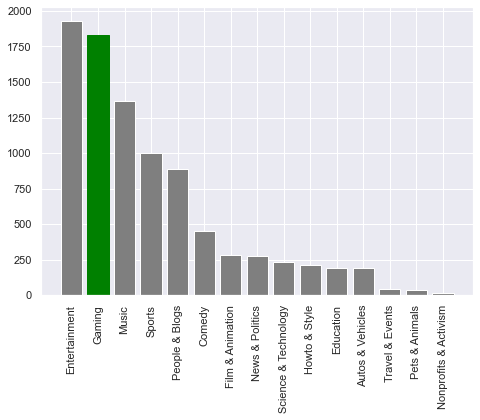

In [67]:
#videoCountPerCat.plot.bar()
sns.set(style="darkgrid")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = videoCountPerCat.index
students = videoCountPerCat.array
bar_colors = 'tab:grey'
barlist=ax.bar(langs,students,color=bar_colors)

index = videoCountPerCat.index.get_loc('Gaming')

barlist[index].set_color('green') # das muss eleganter gehen
plt.xticks(rotation=90)
plt.show()

In [68]:
### hier nichts ausführen, sonst verschwindet der Output.



Nun widmen wir uns der zweiten Fragestellung:


### Analyse der Frage "Was macht ein gutes Gaming-Video aus?":

Wir benötigen also nur die Daten über Gaming, richtig?

- Extrahiere die Daten anhand der **Kategorie** Gaming, um darauf arbeiten zu können.
- Hinweis: Pandas mag es nicht, wenn man direkt auf einem Slice arbeitet, erstellt daher eine Kopie von dem Slice (copy()), damit keine Fehler entstehen. 
<span style="color:red">
**Schreibt den Python Code dafür in die nächste Zelle. **
</span>



In [69]:
gaming_data = youtube_data[youtube_data['category_name']=='Gaming'].copy()
gaming_data

,published_at,channel,title,duration,caption,licensed_content,projection,trend_time_hours,weekday,hours_until_trend,...,likes_growth/hour,first_rank,best_rank,views_growth,views_growth/hour,views_cleaned,likes_cleaned,dislikes_cleaned,comments_cleaned,category_name
2,2021-04-03 13:00:14+00:00,Brawl Stars,"Brawl Stars: Brawl Talk! Two New Brawlers, TON...",255,True,True,rectangular,26.125556,0,55.488889,...,709.764811,3,3,3051500,116801.343937,20797544,940030.0,11778.0,114130.0,Gaming
7,2021-04-04 21:57:24+00:00,Technoblade,"I Must Win MrBeast's $10,000 Refrigerator",788,False,True,rectangular,76.758889,0,22.536111,...,2151.281791,8,1,4036487,52586.574121,6988056,594257.0,3372.0,30740.0,Gaming
9,2021-04-03 18:58:05+00:00,ELoTRiX - Clips,ROLEX von UNSYMPATHISCHTV GESCHENKT BEKOMMEN -...,238,False,True,rectangular,0.477778,0,49.524722,...,175.813953,10,10,1724,3608.372093,220157,16823.0,159.0,494.0,Gaming
19,2021-04-04 19:00:00+00:00,Grian,Hermitcraft 7: Episode 73 - C.E.O of BARGE Co.,1374,False,True,rectangular,50.442222,0,25.492778,...,371.930482,20,3,678741,13455.810829,1983417,119843.0,807.0,21864.0,Gaming
24,2021-04-04 18:14:54+00:00,MrBeast Gaming,Hide And Seek Across The Earth!,589,False,True,rectangular,69.658889,0,26.244444,...,2161.360917,25,6,6372900,91487.247380,14851126,697718.0,9338.0,50360.0,Gaming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9061,2021-12-11 00:30:00+00:00,Doni Bobes,I Put my Friend in a World where NOTHING is Re...,2073,False,True,rectangular,7.916667,5,19.968056,...,464.589474,49,45,131506,16611.284211,791517,36442.0,1134.0,4603.0,Gaming
9090,2021-12-11 16:00:33+00:00,Let's Game It Out,This Theme Park is 100% Pure Havoc - Planet Co...,859,False,True,rectangular,17.816389,0,32.459167,...,442.570043,26,20,179217,10059.109122,1384507,92165.0,904.0,4852.0,Gaming
9094,2021-12-11 15:00:21+00:00,DYMA,Letztes Mal Babysitten mit DYMA 💛| IG: @itsdyma,27,False,True,rectangular,15.416389,0,33.462500,...,44.368367,30,29,5458,354.038812,168073,13229.0,148.0,60.0,Gaming
9096,2021-12-11 15:00:23+00:00,RedSama,DOUBLE PUMP IST ZURÜCK und es ist BESSER ALS N...,554,False,True,rectangular,15.416389,0,33.461944,...,26.724806,32,22,8132,527.490585,91339,7543.0,124.0,277.0,Gaming


In [70]:
### hier nichts ausführen, sonst verschwindet der Output.


Jetzt können wir diverse Plots erstellen und uns ansehen, was die beliebtesten Gamingvideos ausmachen.
Anschließend können wir daran Aussagen treffen.

Um herauszufinden, was das "beliebteste" Gaming-Video ausmacht, müssen wir zunächst definieren, was "beliebt" bedeutet. 
Ist es die Anzahl der Ansichten, die Anzahl der Likes, Kommentare oder eine Kombination davon?

### Kriterien:
Lasst uns die Daten basierend auf den folgenden Kriterien analysieren:

1. **Popularität**: 
    - Verteilung der Anzahl der Aufrufe und Likes.
    - Top-Videos basierend auf Ansichten und Likes.

2. **Performance von Kanälen**:
    - welche Kanäle haben im Durchschnitt die meisten Aufrufe und Likes 

3. **Verteilung der Videolänge**
   - Verteilung der Videolängen für die beliebtesten Videos

4. **Schnelligkeit des Trends**: 
    - Verteilung der Stunden bis zum Trend ("hours_until_trend").
    - Top-Videos, die am schnellsten in die Trends gekommen sind.

4. **Wochentag der Veröffentlichung**:
    - Analyse des Veröffentlichungstags der Woche.

-----

Beginnen wir mit dem ersten Punkt: 
### 1. Popularität.
- Wir plotten die Verteilung der Views und der Likes
- nutzt dafür ein Histogramm 
- nutzt die Bibliothek ``seaborn``


<span style="color:red">
**Schreibt den Python Code dafür in die nächste Zelle. **
</span>


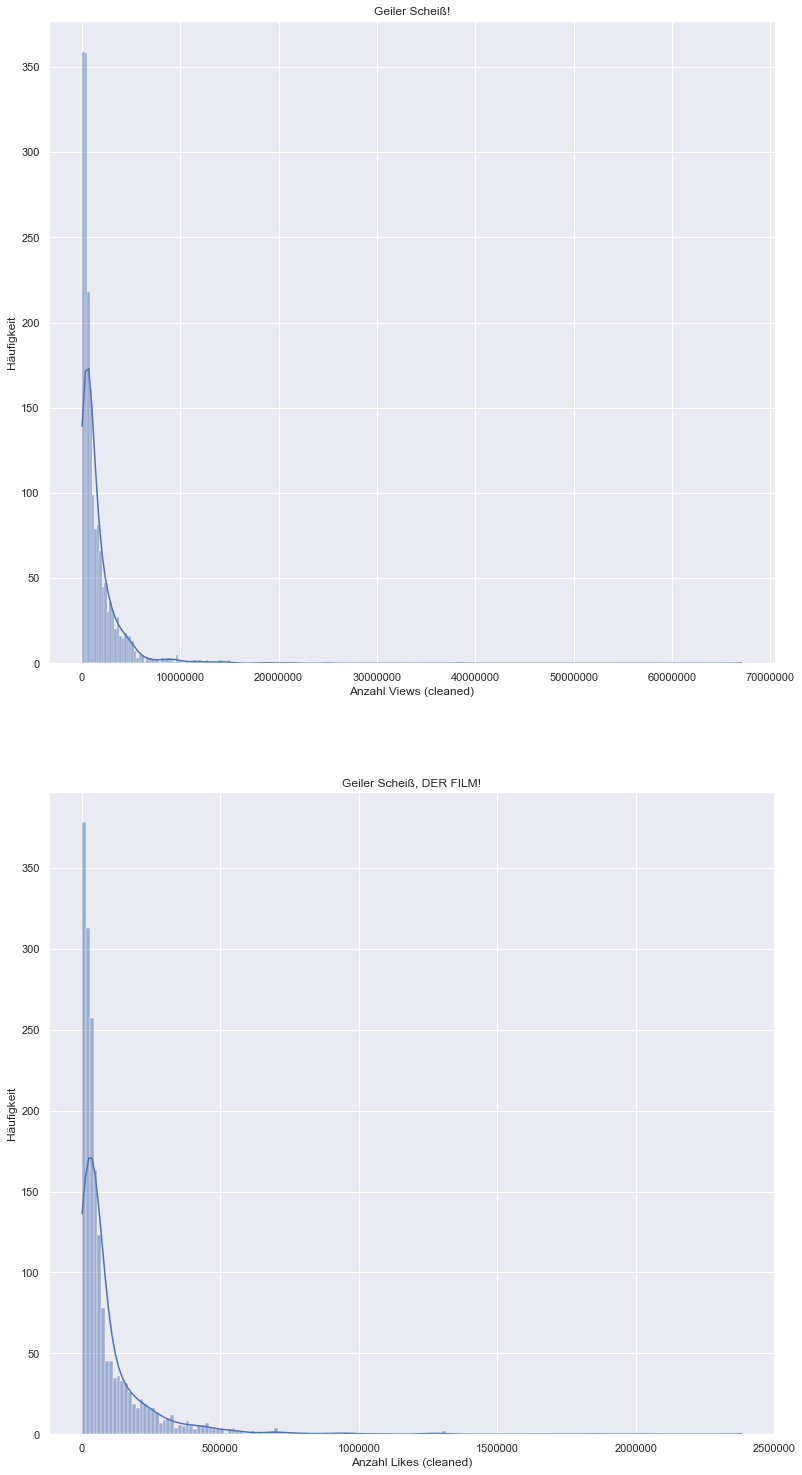

In [71]:
### Hier sollte euer Code stehen

f, axes = plt.subplots(2,1,figsize=(13, 26)) # mit figsize passt man die größe an. (surprise)
h=sns.histplot(gaming_data.views_cleaned,kde=True,ax=axes[0])
h.set(xlabel="Anzahl Views (cleaned)",ylabel="Häufigkeit",title="Geiler Scheiß!")
axes[0].ticklabel_format(axis='x',style='plain')
axes[1].ticklabel_format(axis='x',style='plain')
sns.histplot(gaming_data.likes_cleaned,kde=True,ax=axes[1]).set(xlabel="Anzahl Likes (cleaned)",ylabel="Häufigkeit",title="Geiler Scheiß, DER FILM!")

# Frage: wie definiert man die Größe der Plots? 

plt.show()

In [72]:
### hier nichts ausführen, sonst verschwindet der Output.


### Analyse: 
<span style="color:red">
**Schreibt den eine kurze Analyse und Interpretation der Plots. **
</span>

### Analyse:

- Es gibt viele Videos, welche Selten gesehen und selten gelike Werden. 
- Die verteilung von Views und Likes ist annähernd gleich, stehen in beziehung zu einander 


### 2. Performance verschiedener Kanäle
Als nächstes werden wir die Performance verschiedener Kanäle analysieren und herausfinden, welche Kanäle im Durchschnitt die meisten Aufrufe und Likes haben.

- nutzt dafür auch die Bibliothek seaborn
- Tipp: nutzt die Funktionen **groupby()** und **agg()** um Daten zu filtern
- wir berechnen den Durchschnitt
- danach plotten wir die Views mit einem Balkendiagramm (barplot)
- und die Likes mit einem Liniendiagramm (lineplot)
<span style="color:red">
**Schreibt den Python Code dafür in die nächste Zelle. **
</span>



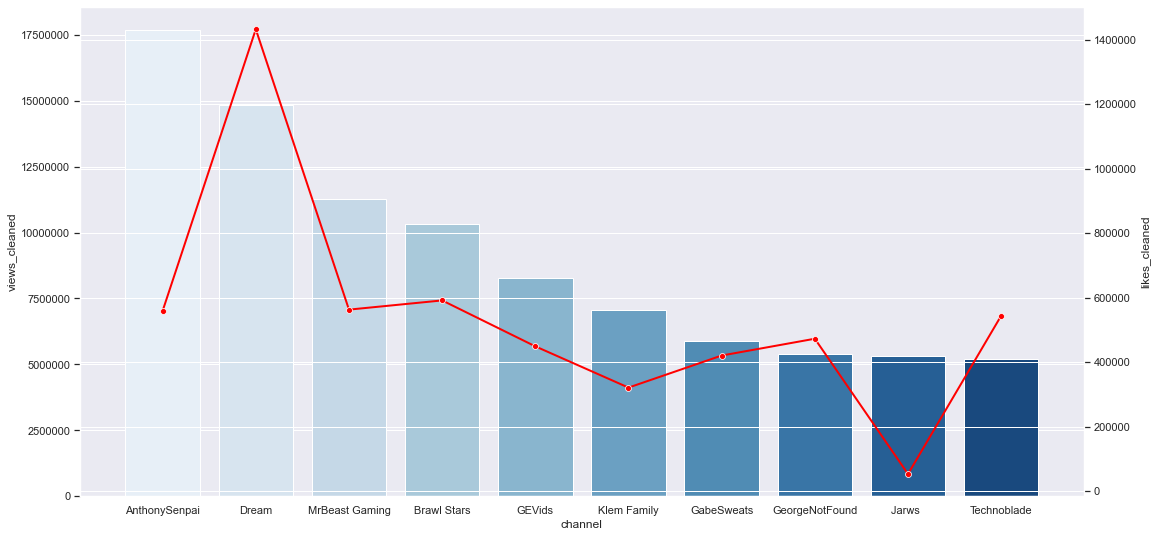

In [73]:
### hier sollte euer Code stehen
# nimm die gaming daten,                                       gaming_data...
# gruppiere nach channel,                                      ...groupby('channel')...
# berechne die mittelwerte (der Numerischen eigenschaften???)  ...mean()...
# sortiere das ergebnis, absteigend nach views_cleaned         ...sort_values(by="views_cleaned", ascending=False)...
# nimm die ersten 10 Zeilen/ergebnisse                         ...[0:10]
relevante_channels = gaming_data.groupby('channel').mean(numeric_only=True).sort_values(by="views_cleaned", ascending=False)[0:10] #gaming_data['views_cleaned'].sort_values(ascending=False)[0:10]


fig, ax1 = plt.subplots(figsize=(18,9)) # keine ahnung.

ax2 = ax1.twinx() # die x-achse duplizieren, um die beiden plots zu überlagern. 

# den bar-plot anlegen.
sns.barplot(x=relevante_channels.index,
            y='views_cleaned',
            data=relevante_channels,
            palette = "Blues", # diese zeile mach die bunten balken. 
            ax=ax1) 

# die rote linie malen
sns.lineplot(data = relevante_channels["likes_cleaned"],color='red',linewidth=2, marker='o', sort = False, ax=ax2) 

plt.xticks(rotation=70) # FG: EIgentlich sollten die label gedreht sein.... schade

ax1.ticklabel_format(axis='y',style='plain') # die AchenBeschriftung in 'normalerweise' langer darstellung ausschreiben
ax2.ticklabel_format(axis='y',style='plain') # die AchenBeschriftung in 'normalerweise' langer darstellung ausschreiben

#plt.show()

#relevante_channels.dtypes
#relevante_channels.index

In [74]:
### hier nichts ausführen, sonst verschwindet der Output.


### Analyse
<span style="color:red">
**Schreibt den eine kurze Analyse und Interpretation der Plots. **
</span>

### Analyse:

- hier ist Platz für euren Text.


### 3. Videodauer

Wir werden die Daten in Bezug auf die Video-Dauer weiter analysieren und sie in einem Histogramm darstellen, um die Verteilung der Videolängen für die beliebtesten Videos (basierend auf Aufrufen und Likes) zu zeigen.

Geht bitte wie folgt vor:

- Videos in verschiedene Kategorien einteilen basierend auf ihrer Dauer (z.B. 0-5 Minuten, 5-10 Minuten, usw.).
- Durchschnitt der Aufrufe und Likes für jede Kategorie berechnen.
- Durchschnittswerte in einem Balkendiagramm darstellen, um zu zeigen, welche Videolängen-Kategorie im Durchschnitt die meisten Aufrufe und Likes erhält.
- nutzt wieder die Bibliothek ``seaborn`` dafür
- Funktionen **groupby()** und **agg()** helfen euch
- für die bins darzustellen könnte die pandas-Funktion **cut()** hilfreich sein
- nutzt subplots

In [75]:
### hier sollte euer Code stehen


In [76]:
### hier nichts ausführen, sonst verschwindet der Output.


### Analyse
<span style="color:red">
**Schreibt den eine kurze Analyse und Interpretation der Plots. **
</span>

### Analyse:

- hier ist Platz für euren Text.


### 4. Wie schnell landet ein Video in den Trends
- nun Wollen wir uns ansehen, welche Kanäle es am schnellsten in die Trends geschafft haben:

- Verwendet hierfür auch seaborn
- plottet ein Histogramm mit 'hours_until_trend'
- Erstellt eine Tabelle die eine sortierte Liste mit den Kanälen ausgibt

Text(0, 0.5, 'Anzahl')

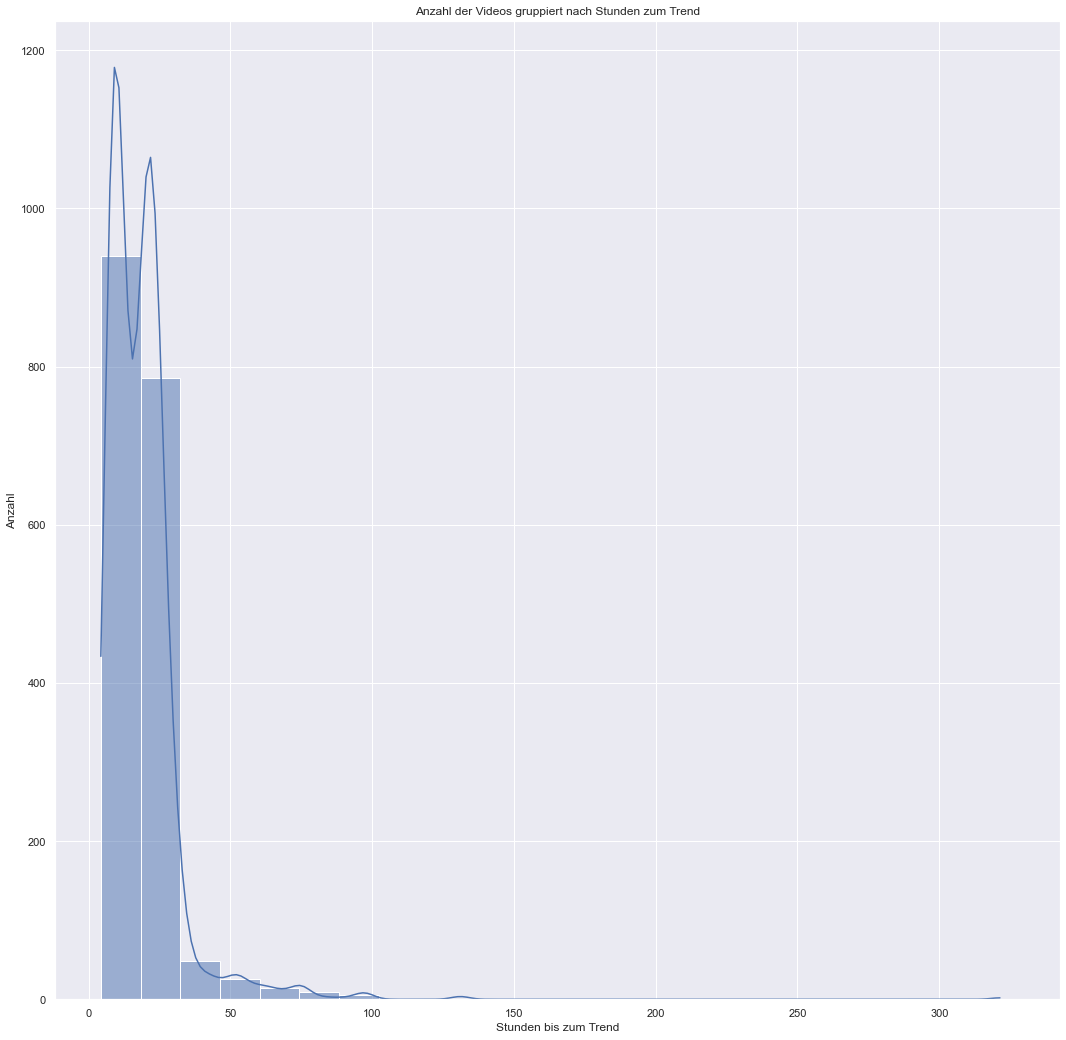

In [90]:
### hier sollte euer Code stehen

# Daten vorbereiten: 
gaming_data.hours_until_trend.min()

intervalgrenzen=range(np.floor(gaming_data.hours_until_trend.min()).astype(int),
                      np.ceil(gaming_data.hours_until_trend.max()).astype(int)+10,
                      10)
#print(intervalgrenzen)


#gaming_data['hours_until_trend_class'] = pd.cut(x=gaming_data.hours_until_trend,bins=intervalgrenzen,labels=intervalgrenzen[0:len(intervalgrenzen)-1],retbins=False,include_lowest=True)
#gaming_data['hours_until_trend_class'] = pd.cut(x=gaming_data.hours_until_trend,bins=intervalgrenzen,include_lowest=True)
#gaming_data.head()


plt.figure(figsize=(18,18))

achsen = sns.histplot(data=gaming_data,
             x='hours_until_trend',
             stat='count',
             binwidth=10,
             kde=True
             )
achsen.set_title('Anzahl der Videos gruppiert nach Stunden zum Trend')
achsen.set_xlabel('Stunden bis zum Trend')
achsen.set_ylabel('Anzahl')
#dff = gaming_data.assign(hut_class_label=lambda x:''.join(str((x['hours_until_trend_class'].iloc[0]))))

# Versuche mit den artikel: https://www.tutorialspoint.com/how-to-group-data-by-time-intervals-in-python-pandas




In [78]:
### hier nichts ausführen, sonst verschwindet der Output.


### Analyse
<span style="color:red">
**Schreibt den eine kurze Analyse und Interpretation der Plots. **
</span>

### Analyse:

- hier ist Platz für euren Text.


### 5. Wochentag
Lasst uns den Veröffentlichungstag der Woche analysieren, um zu sehen, ob es bestimmte Tage gibt, an denen Videos tendenziell beliebter sind.

Wir gehen wie folgt vor:
- Wochentag aus dem Veröffentlichungsdatum extrahieren.
- durchschnittliche Anzahl von Aufrufen und Likes für jeden Wochentag berechnen.
- die erhaltenen Durchschnittswerte in einem Balkendiagramm darstellen, um zu zeigen, welche Wochentage im Durchschnitt die meisten Aufrufe und Likes erhalten.
- der Code der vorherigen Aufgaben wird euch hier eine goße Hilfe sein.
<span style="color:red">
**Schreibt den code dafür. **
</span>

In [79]:
### code goes here :D



In [80]:
### hier nichts ausführen, sonst verschwindet der Output.


### Analyse
<span style="color:red">
**Schreibt den eine kurze Analyse und Interpretation der Plots. **
</span>

### Analyse:

- hier ist Platz für euren Text.


## Zusatzaufgabe zu Korrelationen (optional)
- Lies dir durch, was Korrelationen sind
- welche Algorithmen (Korrelationskoeffizienten) es gibt
- welche Voraussetzungen diese benötigen
- wie man sie mit python anwenden kann

Hinweis: das macht die nächste Praktikumsaufgabe leichter zu bewältigen

